<a href="https://colab.research.google.com/github/arbres-rouges-noirs/Classifying-Damage-in-Ceramics/blob/main/Damage_Classification_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine**

In [ ]:
#MODEL: SUPPORT VECTOR MACHINE
#FINAL

import io
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif, SelectKBest

drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#Feature selection by Select K Best
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]
selector = SelectKBest(f_classif, k = 5)
X = selector.fit_transform(old_X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': [ 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
#Define model, cross validation and hyperparameter tuning
baseline_svm = SVC()
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=baseline_svm, param_grid=param_grid, cv=loo)
# Fit the model with the grid of hyperparameters
grid_search.fit(X_train, y_train)
params = grid_search.best_params_

final_svm = SVC(C=params['C'],
                kernel=params['kernel'],
                gamma=params['gamma'])

final_svm.fit(X_train, y_train)
y_pred_test = final_svm.predict(X_test)
y_pred_val = final_svm.predict(X_val)

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

scores = cross_val_score(final_svm,
                         X, y,
                         cv = loo,
                         scoring="accuracy",
                         error_score='raise')

print(f"Classification Report for test set: {classification_report(y_test, y_pred_test)}")
print(f"Classification Report for validation set: {classification_report(y_val, y_pred_val)}")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

mse = root_mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f"Best parameters: {params}")
print(f"Test RMSE: {rmse}")

cm = confusion_matrix(y_val, y_pred_val, labels=final_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_svm.classes_)

disp.plot()
plt.show()

Mounted at /content/gdrive


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
#MODEL: SUPPORT VECTOR MACHINE
#FINAL

import io
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif, SelectKBest

drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#Feature selection by ANOVA model (Brownlee, Jason)
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]
selector = SelectKBest(f_classif, k = 5)
X = selector.fit_transform(old_X, y)

selected_features = selector.get_support(indices=True)
FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR',
            'FORM FACTOR', 'PULSE INDICATOR', 'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f', 'DAMAGE']
selected_features_names = [FEATURES[i] for i in selected_features]

print(selected_features_names)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['MIN', 'PEAK', 'P2P', 'CREST FACTOR', 'PULSE INDICATOR']


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
For test set:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

For validation set:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Cross Validation Scores:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

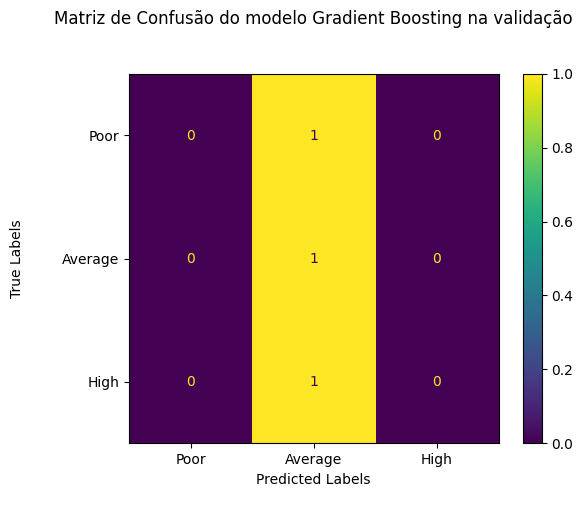

In [ ]:
#MODEL: GRADIENT BOOSTING

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import io
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, LeaveOneOut,  learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import root_mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif

drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#df = pd.read_csv(filename, encoding='latin-1')
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]

#Feature selection by ANOVA model (Brownlee, Jason)
X = SelectKBest(f_classif, k = 5).fit_transform(old_X, y)
'''

filename = 'ceramic_damage.csv'
df = pd.read_csv(filename, encoding='latin-1')
'''
#df = df.drop(columns = ['PLAYER', 'CS'])
X = df.iloc[:,0:17]
y = df.iloc[:,17]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

gbr = GradientBoostingClassifier()
loo = LeaveOneOut()

param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=loo, scoring='accuracy')
grid_search.fit(X_train, y_train)

params = grid_search.best_params_
final_gbr = GradientBoostingClassifier(n_estimators=params['n_estimators'],
                                       learning_rate=params['learning_rate'],
                                       max_depth=params['max_depth'])

final_gbr.fit(X_train, y_train)
y_pred_test = final_gbr.predict(X_test)
y_pred_val = final_gbr.predict(X_val)

scores = cross_val_score(gbr, X, y, cv = loo)

print("For test set:\n")
print(classification_report(y_test, y_pred_test))
print("For validation set:\n")
print(classification_report(y_val, y_pred_val))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

#gbr.fit(X_train, y_train)
#print(cross_val_score(gbr, X_train, y_train, cv = 3, n_jobs=-1).mean())

mse = root_mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5

print(f"Best parameters: {params}")
print(f"Test RMSE: {rmse}")

#print(cross_val_score(gbr2, X_train, y_train, cv = 3, n_jobs=-1).mean())
#print(gbr2.best_params_)

label_names=['Poor', 'Average', 'High']

cm = confusion_matrix(y_val, y_pred_val, labels=final_gbr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)

disp.plot()
plt.title("Matriz de Confusão do modelo Gradient Boosting na validação\n\n")
plt.xlabel("Predicted Labels\n\n")
plt.ylabel("True Labels\n\n")
plt.show()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

For test:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

For validation:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Cross Validation Scores:  [0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
Average CV Score:  0.26666666666666666
Number of CV Scores used in Average:  15
Best parameters: {'colsample_bytree': 0.3, 'gamma': 0.0, 'l

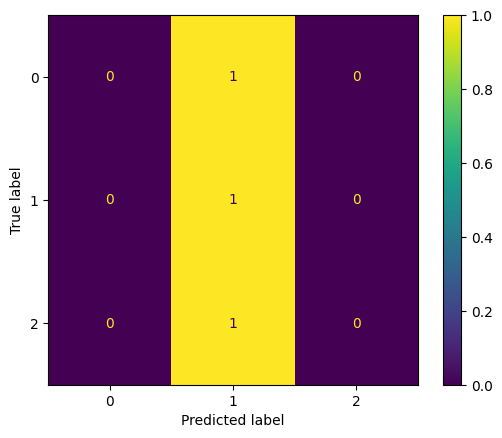

In [ ]:
#MODEL: XGBOOST
#FINAL MODEL

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import io
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, LearningCurveDisplay, ShuffleSplit, LeaveOneOut
from sklearn.feature_selection import SelectKBest, f_classif
#Load dataset
drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#df = pd.read_csv(filename, encoding='latin-1')
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]

#Feature selection by ANOVA model (Brownlee, Jason)
X = SelectKBest(f_classif, k = 5).fit_transform(old_X, y)

X_train, X_Test, y_train, y_Test = train_test_split(X,y,random_state=42, test_size=0.4)
X_test, X_val, y_test, y_val = train_test_split(X_Test, y_Test, test_size=0.5, random_state=42)
# create model instance and cross-validation
xgb = XGBClassifier()
loo = LeaveOneOut()

#define parameters grid for hyperparameter tuning
param_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 10, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

grid_search = GridSearchCV(estimator=xgb, cv=loo, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
params = grid_search.best_params_
final_xgb = XGBClassifier(learning_rate=params['learning_rate'],
                          max_depth=params['max_depth'],
                          min_child_weight=params['min_child_weight'],
                          gamma=params['gamma'],
                          colsample_bytree=params['colsample_bytree']
                          )

final_xgb.fit(X_train, y_train)
y_pred_test = final_xgb.predict(X_test)
y_pred_val = final_xgb.predict(X_val)

scores = cross_val_score(xgb, X, y, cv=loo, scoring='accuracy')
print(f"For test:\n{classification_report(y_test, y_pred_test)}")
print(f"For validation:\n{classification_report(y_val, y_pred_val)}")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Best parameters: {params}")
print(f"Test RMSE: {rmse}")

cm = confusion_matrix(y_val, y_pred_val, labels=final_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb.classes_)

disp.plot()
plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
For test set:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

For validation set:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Cross Validation Scores:  [0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.

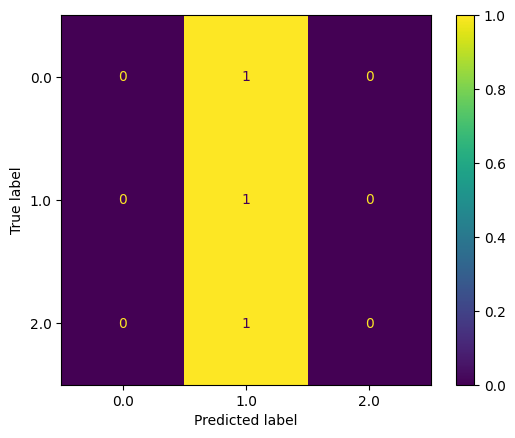

In [ ]:
#MODEL: RANDOM FOREST
#FINAL VERSION

import pandas as pd
from google.colab import drive
import numpy as np
import io
from numpy import mean, std
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, LearningCurveDisplay, ShuffleSplit, LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#df = pd.read_csv(filename, encoding='latin-1')
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]

#Feature selection by ANOVA model (Brownlee, Jason)
X = SelectKBest(f_classif, k = 5).fit_transform(old_X, y)

#Split data into train, test & validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#Set classifier and Cross Validation
rf= RandomForestClassifier()
loo = LeaveOneOut()
#rf.fit(X_train, y_train)

#Define hyperparameters
param_grid = {
    #'n_estimators': [50, 100, 200],
    'max_features': ['log2', 'sqrt', None],
    #'max_depth': [10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['entropy', 'gini', 'log_loss']
}
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=loo, scoring='accuracy')
grid.fit(X_train, y_train)
#Get the best params and use test set
params = grid.best_params_

final_rf = RandomForestClassifier(#n_estimators=params['n_estimators'],
                                  max_features=params['max_features'],
                                  #max_depth=params['max_depth'],
                                  #min_samples_split=params['min_samples_split'],
                                  min_samples_leaf=params['min_samples_leaf'],
                                  criterion=params['criterion'])

final_rf.fit(X_train, y_train)

y_pred_test = final_rf.predict(X_test)
y_pred_val = final_rf.predict(X_val)

scores = cross_val_score(final_rf,
                         X, y,
                         cv = loo,
                         n_jobs=-1,
                         scoring="accuracy",
                         error_score='raise')

#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
#print(rf.score(X_test, y_test))
print("For test set:\n")
print(classification_report(y_test, y_pred_test))
print("For validation set:\n")
print(classification_report(y_val, y_pred_val))
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Best parameters: {params}")
print(f"Test RMSE: {rmse}")

cm = confusion_matrix(y_val, y_pred_val, labels=final_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_rf.classes_)

disp.plot()
plt.show()



In [ ]:
#MODEL: DECISION TREES

# Load libraries
import pandas as pd
from google.colab import drive
import io
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, LeaveOneOut,cross_val_score, GridSearchCV # Import train_test_split function
from sklearn.metrics import root_mean_squared_error #Import scikit-learn metrics module for accuracy calculation

'''filename = 'ceramic_damage.csv'
df = pd.read_csv(filename, encoding='latin-1')'''

#df = df.drop(columns = ['PLAYER', 'CS'])

X = df.iloc[:,0:17]
y = df.iloc[:,17]


drive.mount('/content/gdrive')
df = pd.read_csv('/content/features.csv')

#df = pd.read_csv(filename, encoding='latin-1')
old_X = df.iloc[:,0:17]
y = df.iloc[:,17]

#Feature selection by ANOVA model (Brownlee, Jason)
X = SelectKBest(f_classif, k = 3).fit_transform(old_X, y)

#Split data into train, test & validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

dtree_class = DecisionTreeClassifier()
loo = LeaveOneOut()
param_grid = {
    'max_depth' : [10,20,30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}


grid_search = GridSearchCV(estimator=dtree_class, param_grid=param_grid, cv = loo, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

params = grid_search.best_params_

final_dtree = DecisionTreeClassifier(max_depth=params['max_depth'],
                                     min_samples_split=params['min_samples_split'],
                                     min_samples_leaf=params['min_samples_leaf'])

final_dtree.fit(X_train, y_train)
y_pred_test = final_dtree.predict(X_test)
y_pred_val = final_dtree.predict(X_val)
scores = cross_val_score(final_dtree, X, y, cv = loo)

mse = root_mean_squared_error(y_val, y_pred_val)
rmse = mse ** 0.5

print(f"For test:\n{classification_report(y_test, y_pred_test)}")
print(f"For validation:\n{classification_report(y_val, y_pred_val)}")
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(f"Best parameters: {params}")
print(f"Test RMSE: {rmse}")

cm = confusion_matrix(y_val, y_pred_val, labels=final_dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_dtree.classes_)

disp.plot()
plt.show()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Fitting 9 folds for each of 36 candidates, totalling 324 fits
For test:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

For validation:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      1.00      0.50         1
         2.0       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Cross Validation Sc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m